In [24]:
import pandas as pd

In [25]:
# 1. Read spreadsheet, parse dates, and set the Date column as index
df = pd.read_excel('P & Q.xlsx', parse_dates=["Date"])
df = df.set_index("Date").sort_index()

pd.concat([df.head(5), df.tail(5)])

,P (mm/day),Q (ft^3/sec)
Date,,
1980-01-02,0.00,18
1980-01-03,0.00,17
1980-01-04,0.00,17
1980-01-05,0.00,18
1980-01-06,0.00,18
2014-12-27,0.00,16
2014-12-28,0.00,16
2014-12-29,0.00,16
2014-12-30,0.00,16


In [26]:
# 2. Ensure daily frequency (fill in missing days if needed)
df = df.resample("D").mean()

In [27]:
# 3. Resample by water year (Oct1-Sep30), using mean for each year
annual_stats = df.resample("YE-SEP").agg({
    "P (mm/day)": "sum",     # annual precip total (mm)
    "Q (ft^3/sec)": "mean"     # annual mean streamflow (cfs)
})

# 4. Label by water year (Sep 30 year)
annual_stats['water_year'] = annual_stats.index.year
annual_stats = annual_stats.set_index('water_year')

In [28]:
print(annual_stats.head())
print(annual_stats.tail())

            P (mm/day)  Q (ft^3/sec)
water_year                          
1980            782.63    176.479853
1981            520.31     18.567123
1982            869.25     97.712329
1983           1025.07    131.997260
1984            568.74     47.997268
            P (mm/day)  Q (ft^3/sec)
water_year                          
2011            554.22     30.635616
2012            577.99     19.084699
2013            672.79     33.380822
2014            561.08     25.991781
2015             91.16     16.260870


In [29]:
# 5 set area of watershed
area_m2 = 623920321

# 6 convert streamflow from cfs to mm/day (precip already mm/day)
# conversion factor from cfs to mm/day = 0.0283168 * 86400(seconds in a day) / area in m2 * 1000
df['Q (mm/day)'] = df['Q (ft^3/sec)'] * 0.0283168 * 86400 / area_m2 * 1000

# Optional sanity check
# print(df[['P (mm/day)', 'Q (mm/day)']].head())

In [30]:
print(df[['P (mm/day)', 'Q (mm/day)']].head())

            P (mm/day)  Q (mm/day)
Date                              
1980-01-02         0.0    0.070583
1980-01-03         0.0    0.066662
1980-01-04         0.0    0.066662
1980-01-05         0.0    0.070583
1980-01-06         0.0    0.070583


In [35]:
# 4. Water-year MEANS (Oct 1 → Sep 30)
annual_means = df.resample("YE-SEP").mean()[["P (mm/day)", "Q (mm/day)"]]

# 5. Label rows by the water year (end year, i.e. Sep 30)
annual_means["water_year"] = annual_means.index.year
annual_means = annual_means.set_index("water_year")

print(annual_means.head())

            P (mm/day)  Q (mm/day)
water_year                        
1980          2.866777    0.692028
1981          1.425507    0.072807
1982          2.381507    0.383158
1983          2.808411    0.517599
1984          1.553934    0.188211


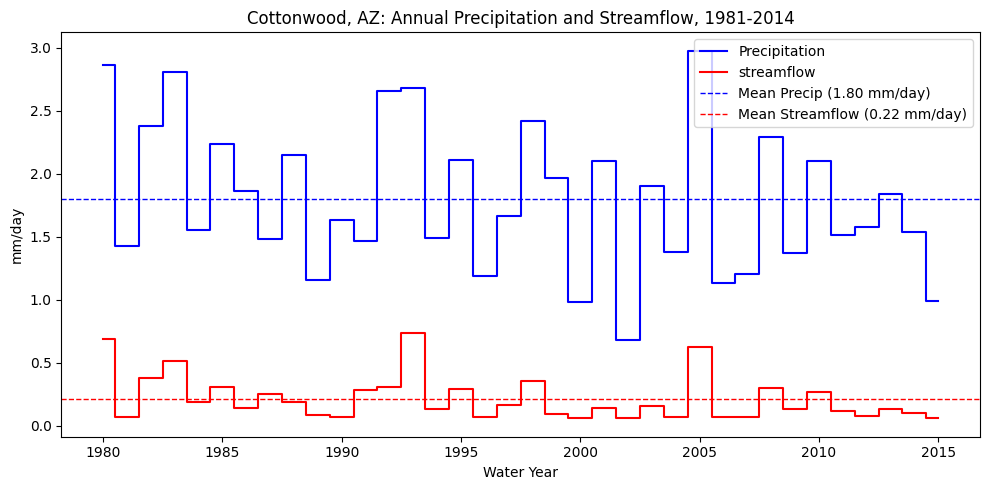

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax.step(annual_means.index, annual_means['P (mm/day)'],
        where='mid', label='Precipitation',color='blue')
ax.step(annual_means.index, annual_means['Q (mm/day)'],
        where='mid', label='streamflow', color='red')

#add total mean for both vars

mean_P = annual_means['P (mm/day)'].mean()
mean_Q = annual_means['Q (mm/day)'].mean()

ax.axhline(mean_P, color='blue', linestyle='--', linewidth=1,
           label=f'Mean Precip ({mean_P:.2f} mm/day)')
ax.axhline(mean_Q, color='red', linestyle='--', linewidth=1,
           label=f'Mean Streamflow ({mean_Q:.2f} mm/day)')

ax.set_xlabel('Water Year')
ax.set_ylabel('mm/day')
ax.set_title("Cottonwood, AZ: Annual Precipitation and Streamflow, 1981-2014")

ax.legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>